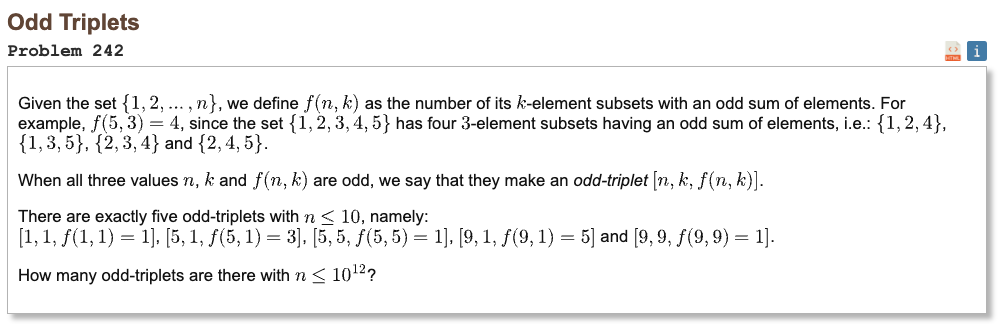

## Initial approach

* rewrite the problem as counting pairs (n,k) where n is odd, k is odd, and f(n,k) is odd
* for odd n, split the set into odds and evens and use a generating function to express the difference between even-sum and odd-sum subsets
* that simplification shows odd-triplets can only happen when n is 1 modulo 4, and also k is 1 modulo 4
* set n = 4a + 1 and k = 4b + 1, then the parity of f(n,k) matches the parity pattern of binomial coefficients C(a,b)
* by Lucas theorem, C(a,b) is odd exactly when every 1 bit of b is also a 1 bit of a
* for a fixed a, the number of b with C(a,b) odd is 2^{popcount(a)}
* so the answer for n ≤ N becomes sum_{a=0..floor((N-1)/4)} 2^{popcount(a)}, which can be computed fast with a bit-recursion using 3^k blocks


In [1]:
from functools import lru_cache

@lru_cache(None)
def S(m):
    if m < 0:
        return 0
    if m == 0:
        return 1
    k = m.bit_length() - 1
    p = 1 << k
    return 3**k + 2 * S(m - p)

def solve():
    N = 10**12
    m = (N - 1) // 4
    return S(m)

In [2]:
%%time
result = solve()
print("Result:", result)

Result: 997104142249036713
CPU times: user 231 μs, sys: 126 μs, total: 357 μs
Wall time: 278 μs
